# Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

Dependent Variable (Target Variable):
- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# Importing Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from statistics import mode

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head() #first 5 rows of data set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring Dataset

In [3]:
df.shape

(614, 13)

Observation - Dataset is containing total of 614 rows and 13 columns

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation - Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area are categorical feature variables while ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History are Numerical Feature Varibles.
Loan_Status is Categorical Type Target Variable

Loan_status has two unique values Y/N that means it is a binary classification problem

# Null Value/Missing Data Analysis

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation - There are some missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History. we need to treat them

# Handling Missing Data

# 1) Handling Gender

In [7]:
mode_value = df['Gender'].mode()[0] #will replace the missing value in age by Mode value
df['Gender'].fillna(value = mode_value,inplace = True)

# 2) Handling Married

In [8]:
mode_value = df['Married'].mode()[0] #will replace the missing value in age by Mode value
df['Married'].fillna(value = mode_value,inplace = True)

# 3) Handling Dependents

In [9]:
mode_value = df['Dependents'].mode()[0] #will replace the missing value in age by Mode value
df['Dependents'].fillna(value = mode_value,inplace = True)

# 4) Handling LoanAmount

In [10]:
median_value = df['LoanAmount'].median() #will replace the missing value in age by median value
df['LoanAmount'].fillna(value = median_value,inplace = True)

# 5) Handling Loan_Amount_Term

In [11]:
median_value = df['Loan_Amount_Term'].median() #will replace the missing value in age by median value
df['Loan_Amount_Term'].fillna(value = median_value,inplace = True)

# 6) Handling Credit_History

In [12]:
median_value = df['Credit_History'].median() #will replace the missing value in age by median value
df['Credit_History'].fillna(value = median_value,inplace = True)

# 7) Handling Self_Employed

In [13]:
mode_value = df['Self_Employed'].mode()[0] #will replace the missing value in age by Mode value
df['Self_Employed'].fillna(value = mode_value,inplace = True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Dropping Unnecessary Column Loan_ID

In [15]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Zero Value Analysis

In [16]:
(df==0).sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

Observation - Two of the columns i.e. CoapplicantIncome and Credit_History have zero value which is fine

# Drop Duplicate Data

In [17]:
#lets drop the duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


Observation - There was no duplicate data as no. of rows are same

# Discriptive Analysis

In [18]:
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


Description - 
- Gender - Most of the people 502 are Male.
- Married - Most of the people are married.
- Dependents - There are 4 unique values and 360 out of 614 people are having zero dependents
- Education - There are 2 unique values in this column, 480 people are Graduate
- Self_Employed - 532 people are not self employed
- ApplicantIncome - Min income = 150, max = 81000, 50% of people have income below 3812.50
- CoapplicantIncome - Min income = 0, max income = 41667, 50% of people have income below 1188.50
- LoanAmount - Min Income = 9, max Income = 700, 50% of people have loan amount below 128.00
- Loan_Amount_Term - Min Term = 12, max term = 480, 50%of people have term below 360
- Credit_History - Min = 0 Max = 1 
- Property_Area - There are 3 unique value, 233 of people are from Semiurban area

# Interpreting Relationship between Features and Target Variable

In [19]:
#separating the Features and Target Variable
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [20]:
x.shape

(614, 11)

# Analysing Target Variable

In [21]:
y.unique()

array(['Y', 'N'], dtype=object)

In [22]:
y.nunique()

2

In [23]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

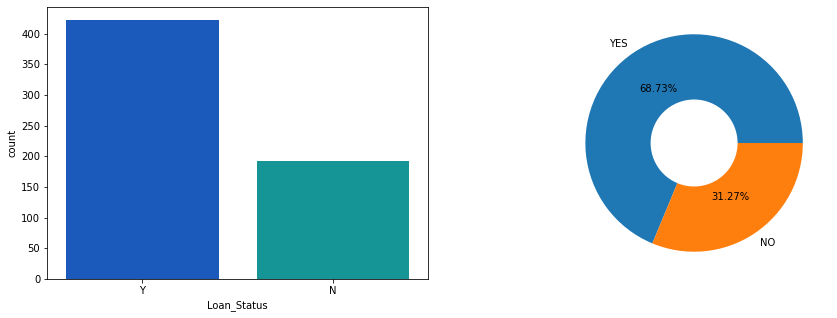

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(y, palette ='winter')

plt.subplot(1,2,2)
labels = 'YES','NO'
plt.pie(y.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 68.73% of people have loan_status YES

# Analysing Feature Variables

1) Gender

In [25]:
x['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
x['Gender'].nunique()

2

In [27]:
x['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

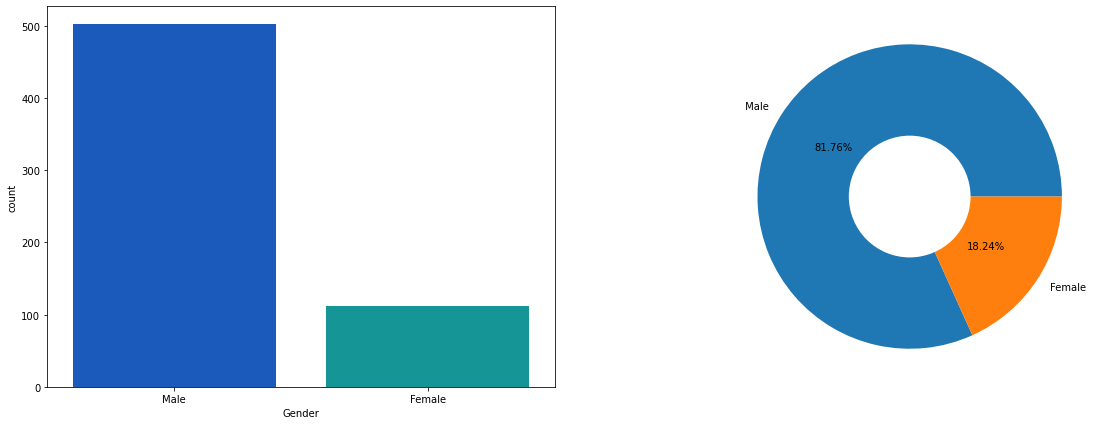

In [28]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x['Gender'], palette ='winter')

plt.subplot(1,2,2)
labels =  ' Male','Female'
plt.pie(x['Gender'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 81% of applicants are male

2) Married

In [29]:
x['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
x['Married'].nunique()

2

In [31]:
x['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

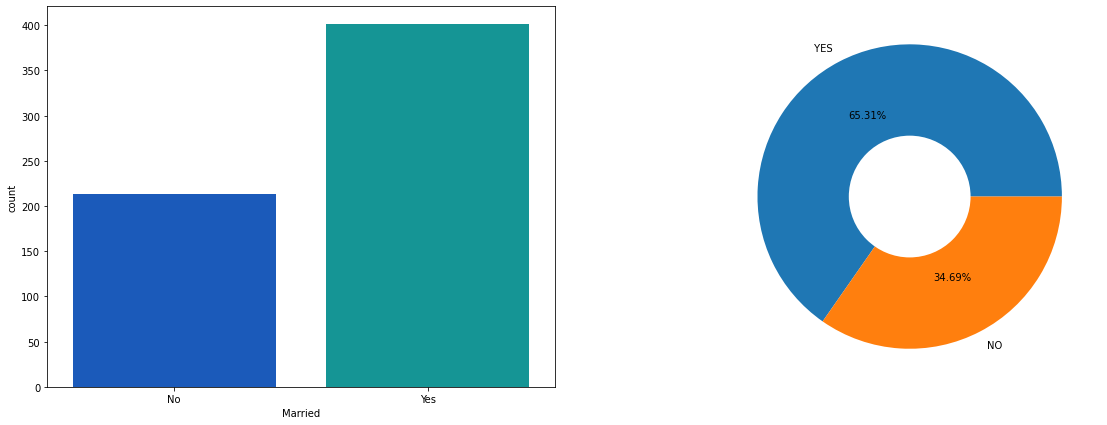

In [32]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x['Married'], palette ='winter')

plt.subplot(1,2,2)
labels =  ' YES','NO'
plt.pie(x['Married'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 65% of applicants are Married

3) Dependents

In [33]:
x['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [34]:
x['Dependents'].nunique()

4

In [35]:
x['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

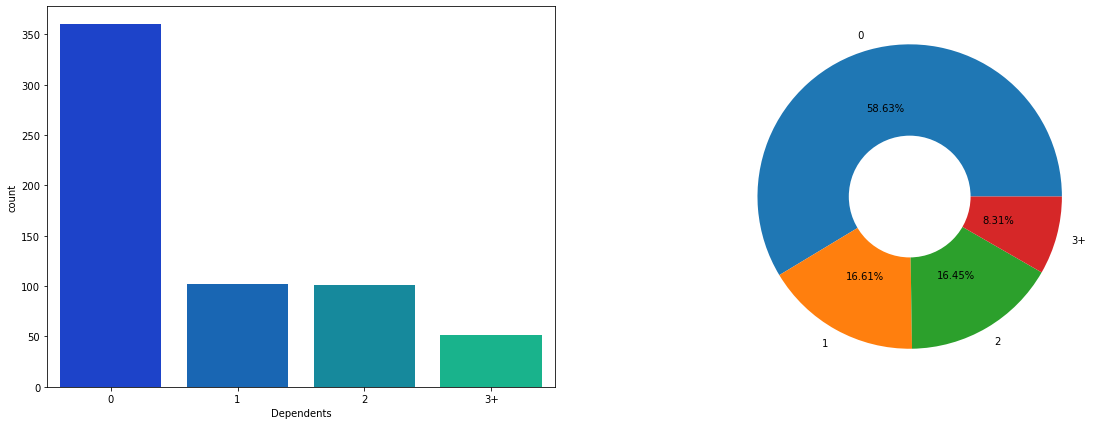

In [36]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x['Dependents'], palette ='winter')

plt.subplot(1,2,2)
labels =  ' 0','1','2','3+'
plt.pie(x['Dependents'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 58% of applicants have zero Dependents

4) Education

In [37]:
x['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [38]:
x['Education'].nunique()

2

In [39]:
x['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

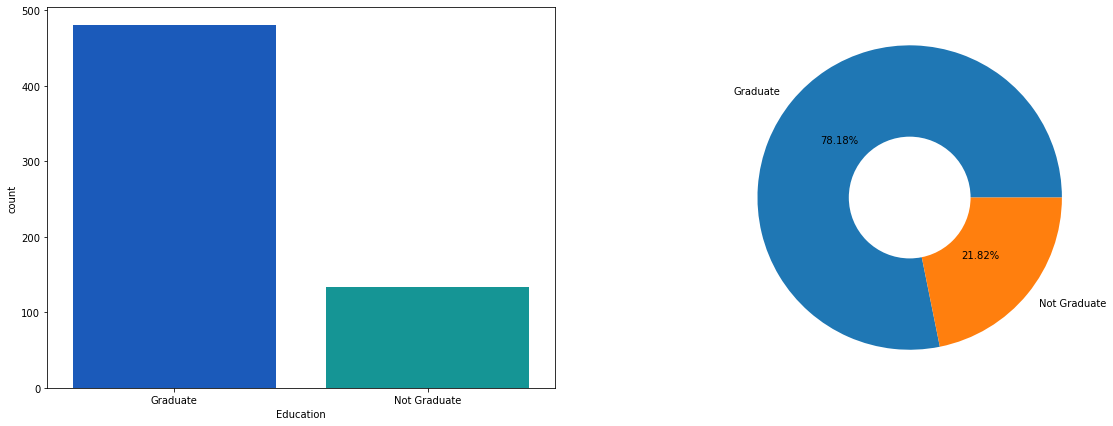

In [40]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x['Education'], palette ='winter')

plt.subplot(1,2,2)
labels =  'Graduate','Not Graduate'
plt.pie(x['Education'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 78% of applicants are Graduate

5) Self_Employed

In [41]:
x['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
x['Self_Employed'].nunique()

2

In [43]:
x['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

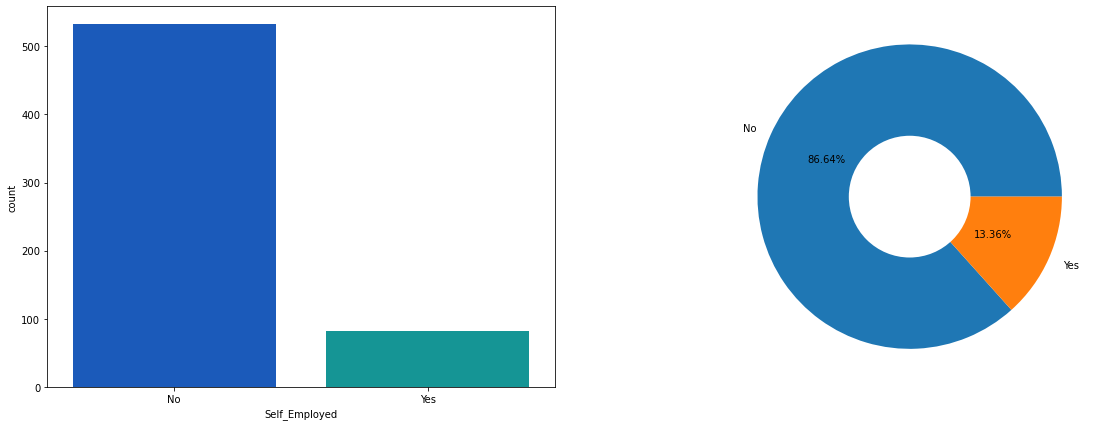

In [44]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x['Self_Employed'], palette ='winter')

plt.subplot(1,2,2)
labels =  'No','Yes'
plt.pie(x['Self_Employed'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 85% of applicants are not self employed

6) Property_Area

In [45]:
x['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [46]:
x['Property_Area'].nunique()

3

In [47]:
x['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

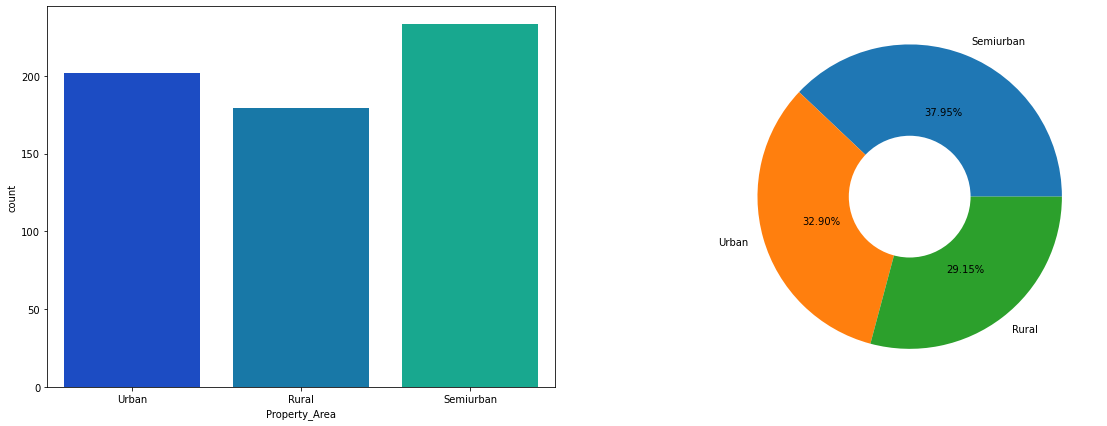

In [48]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.countplot(x['Property_Area'], palette ='winter')

plt.subplot(1,2,2)
labels =  'Semiurban','Urban','Rural'
plt.pie(x['Property_Area'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 38% of applicants are from Semiurban are, 32 % are from Urban area, 29% are of rural area

# Analysing Feature Variables wrt Loan_Status

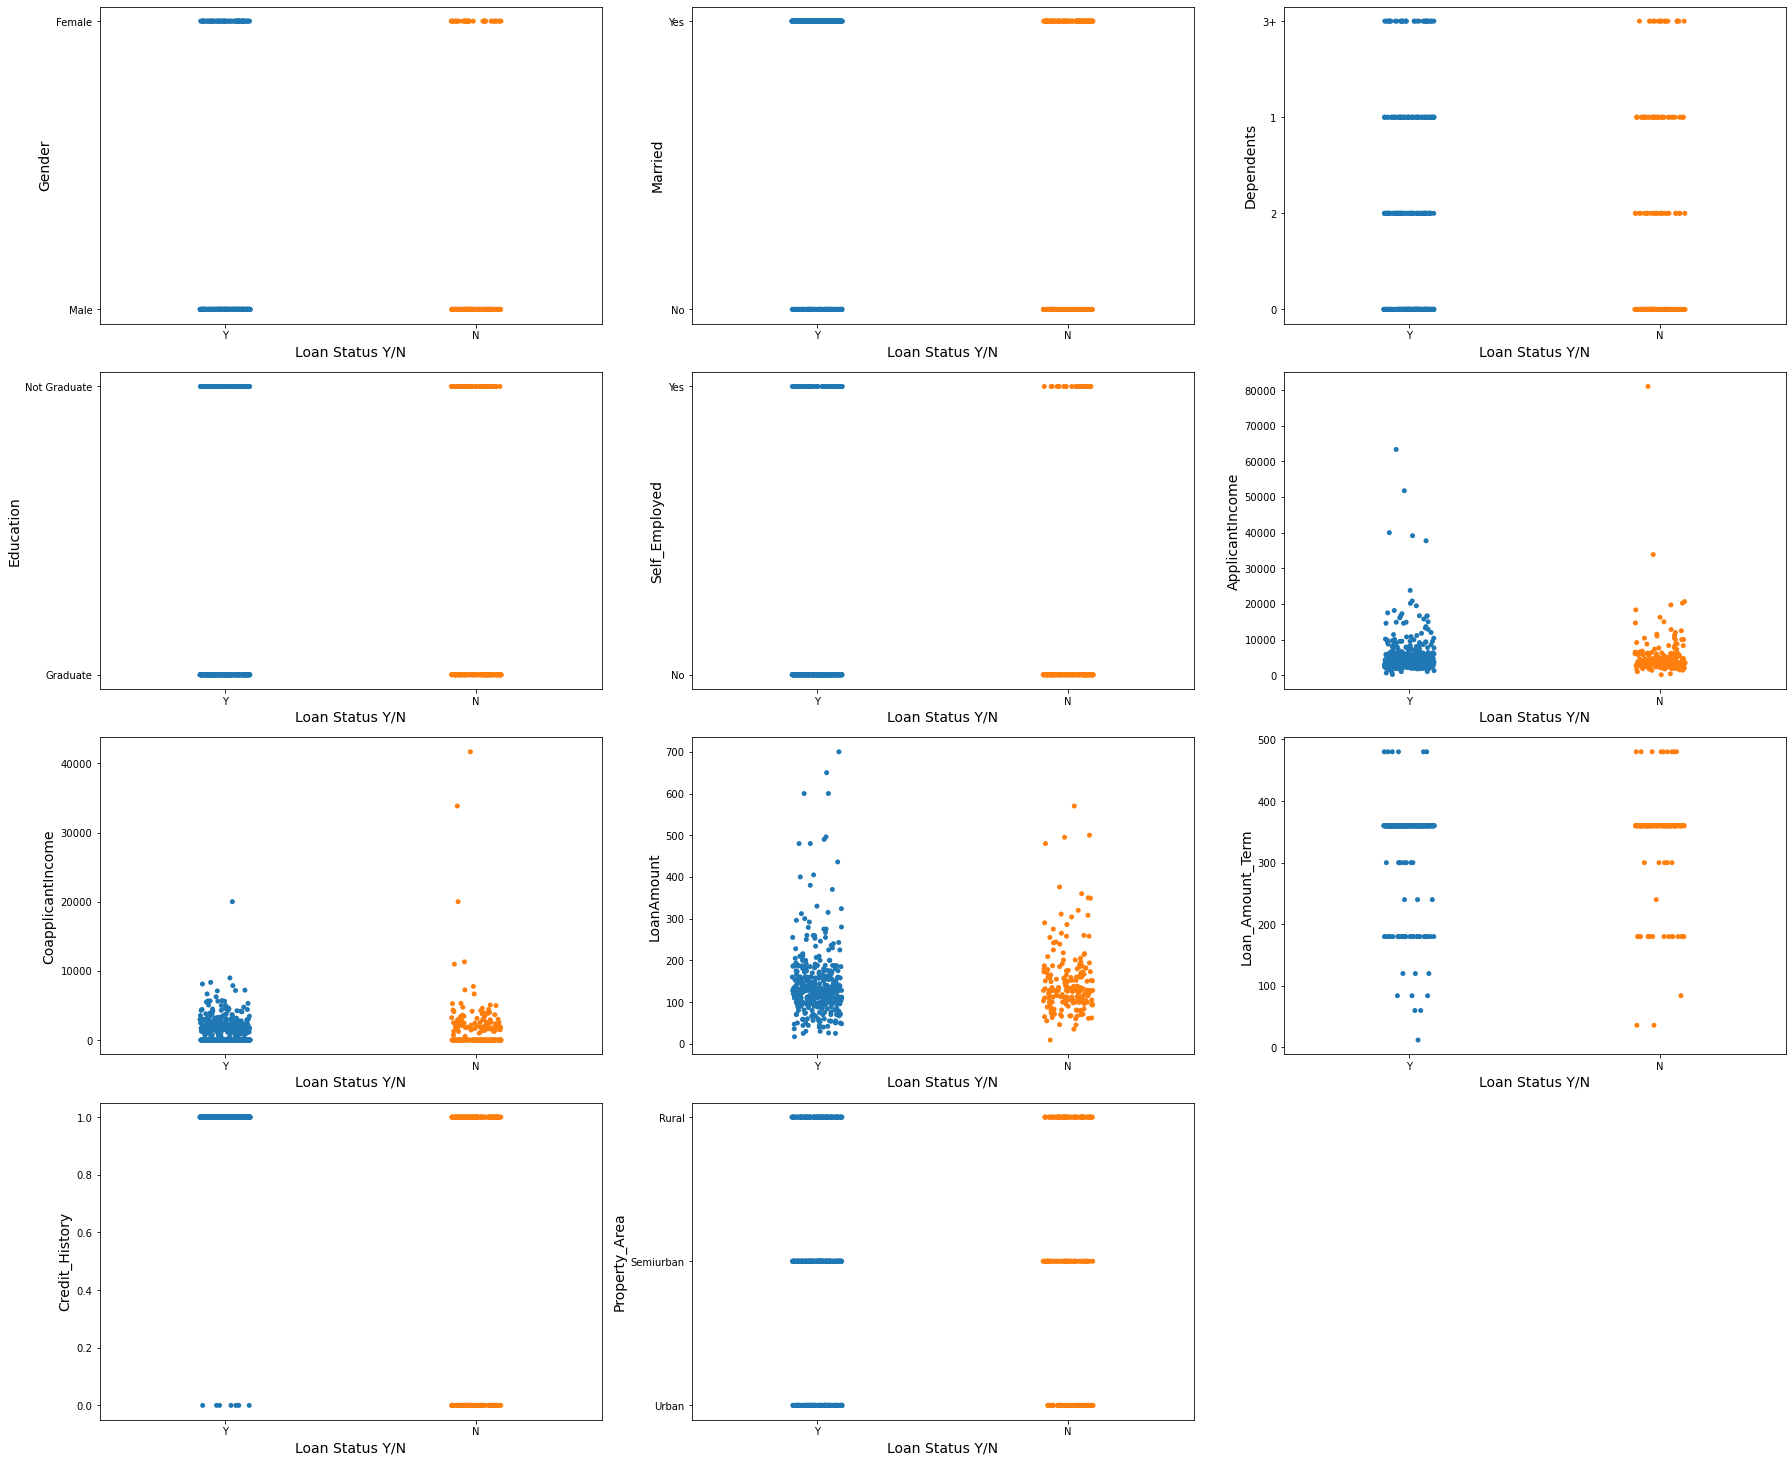

In [49]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=15:
        plt.subplot(5,3,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('Loan Status Y/N',fontsize=14)
        plt.ylabel(col,fontsize=14)
    plotnum+=1
plt.tight_layout()

# Loan_Status wrt Gender

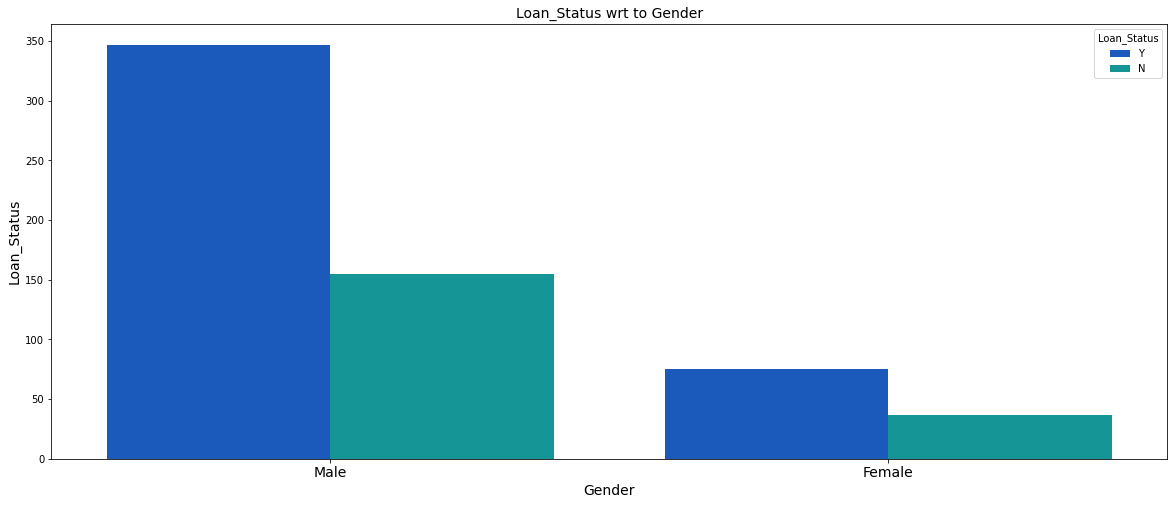

In [50]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Gender', hue='Loan_Status', data = df,palette="winter")

plt.title('Loan_Status wrt to Gender',fontsize=14)
plt.xlabel('Gender',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.show()

# Loan_Status wrt Married

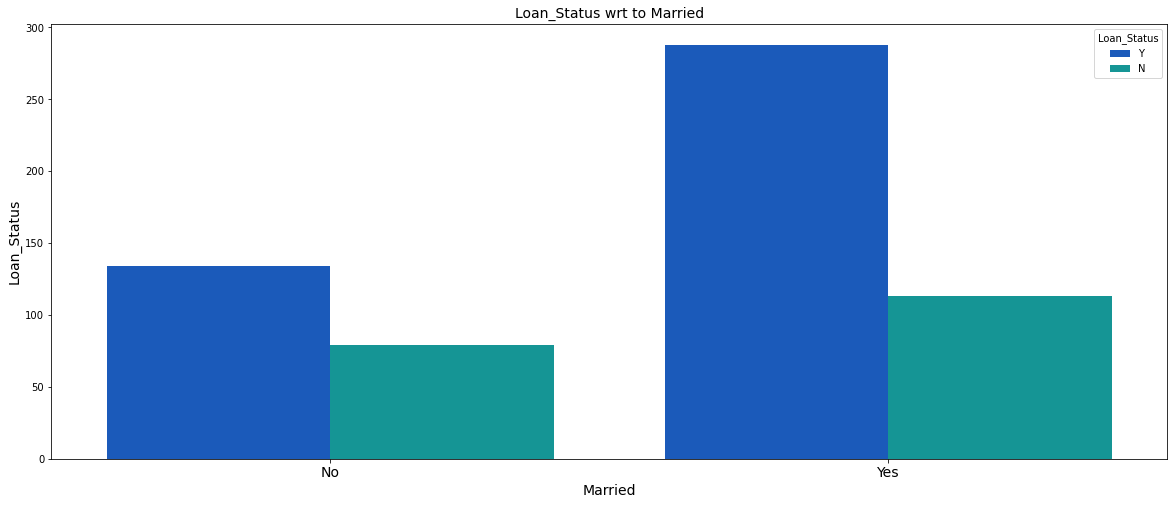

In [51]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Married', hue='Loan_Status', data = df,palette="winter")

plt.title('Loan_Status wrt to Married',fontsize=14)
plt.xlabel('Married',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.show()

# Loan_Status wrt Dependents

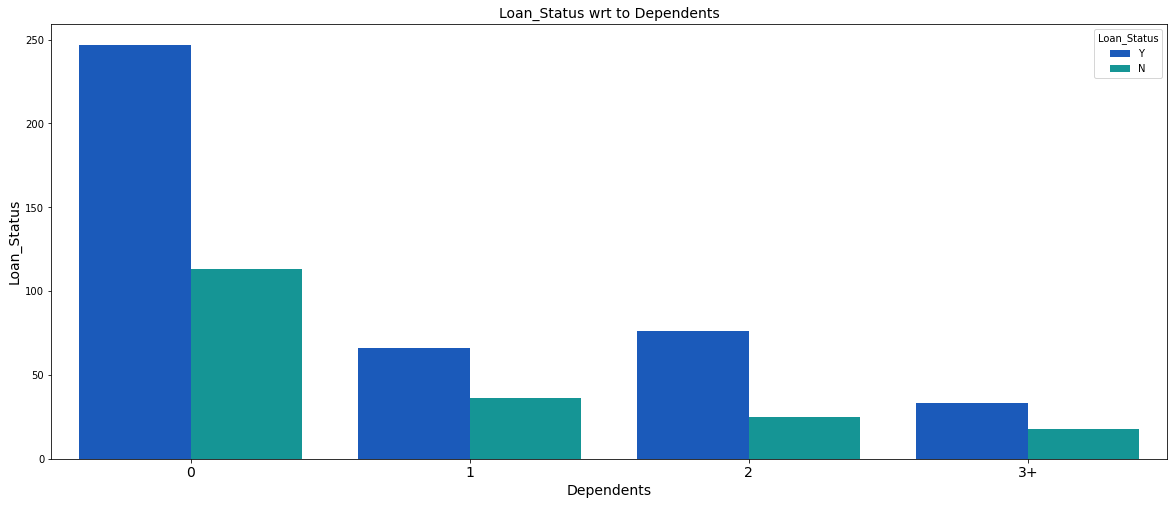

In [52]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Dependents', hue='Loan_Status', data = df,palette="winter")

plt.title('Loan_Status wrt to Dependents',fontsize=14)
plt.xlabel('Dependents',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.show()

# Loan_Status wrt Education

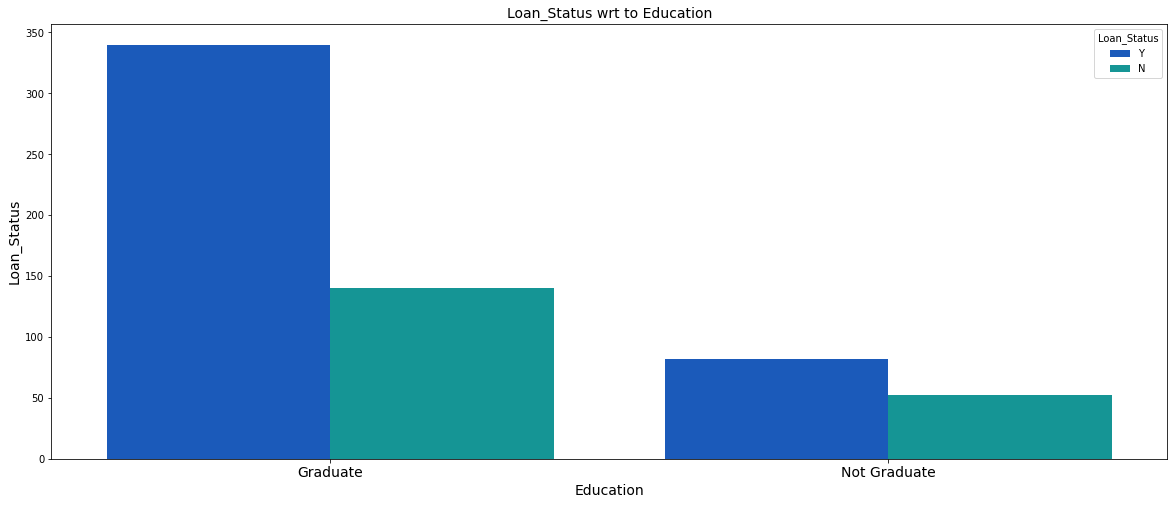

In [53]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Education', hue='Loan_Status', data = df,palette="winter")

plt.title('Loan_Status wrt to Education',fontsize=14)
plt.xlabel('Education',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.show()

# Loan_Status wrt Self_Employed

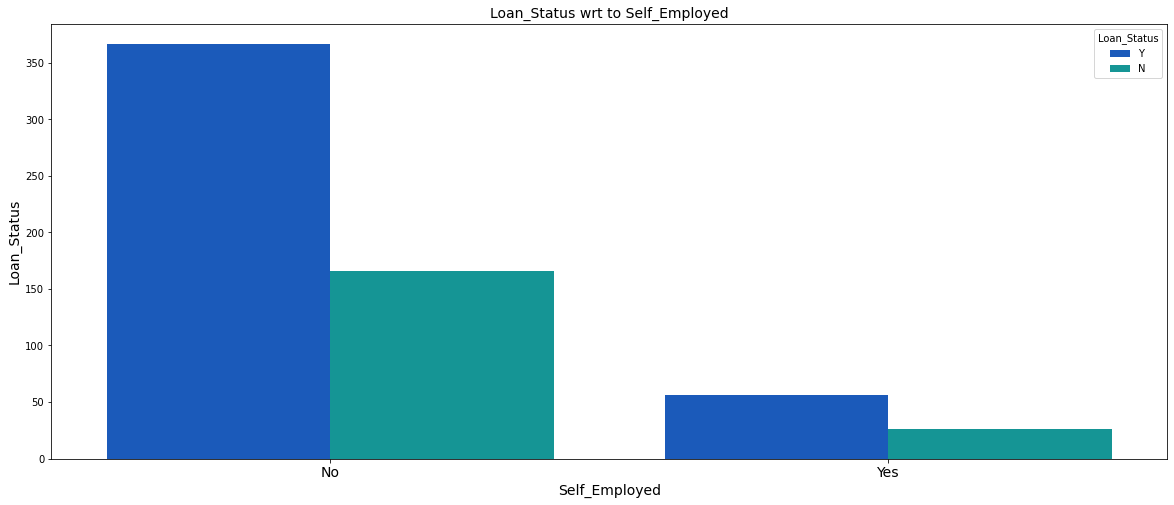

In [54]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Self_Employed', hue='Loan_Status', data = df,palette="winter")

plt.title('Loan_Status wrt to Self_Employed',fontsize=14)
plt.xlabel('Self_Employed',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.show()

# Loan_Status wrt Property_Area

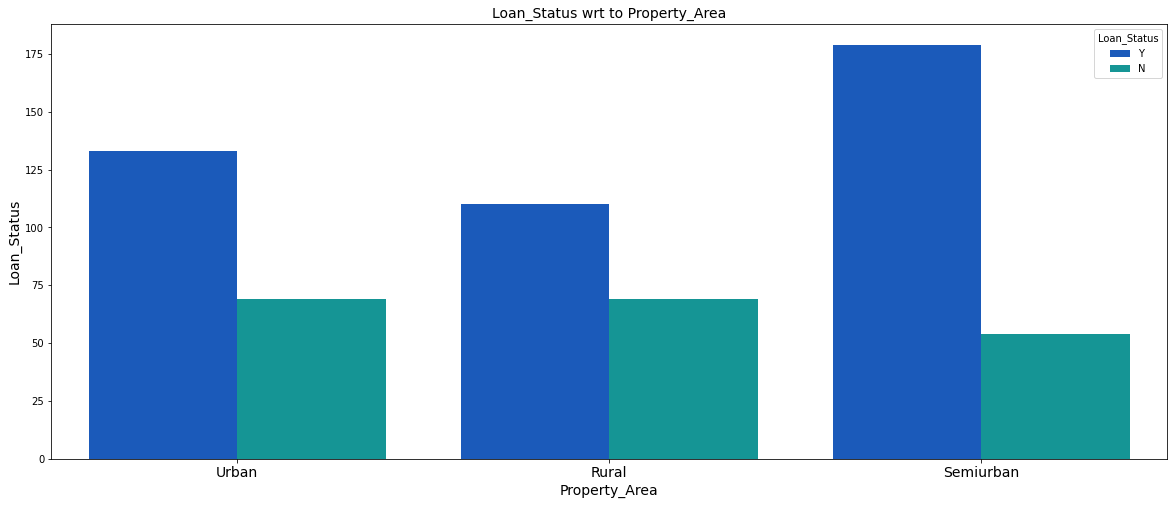

In [55]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Property_Area', hue='Loan_Status', data = df,palette="winter")

plt.title('Loan_Status wrt to Property_Area',fontsize=14)
plt.xlabel('Property_Area',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Loan_Status',fontsize=14)
plt.show()

# Visualising all data together

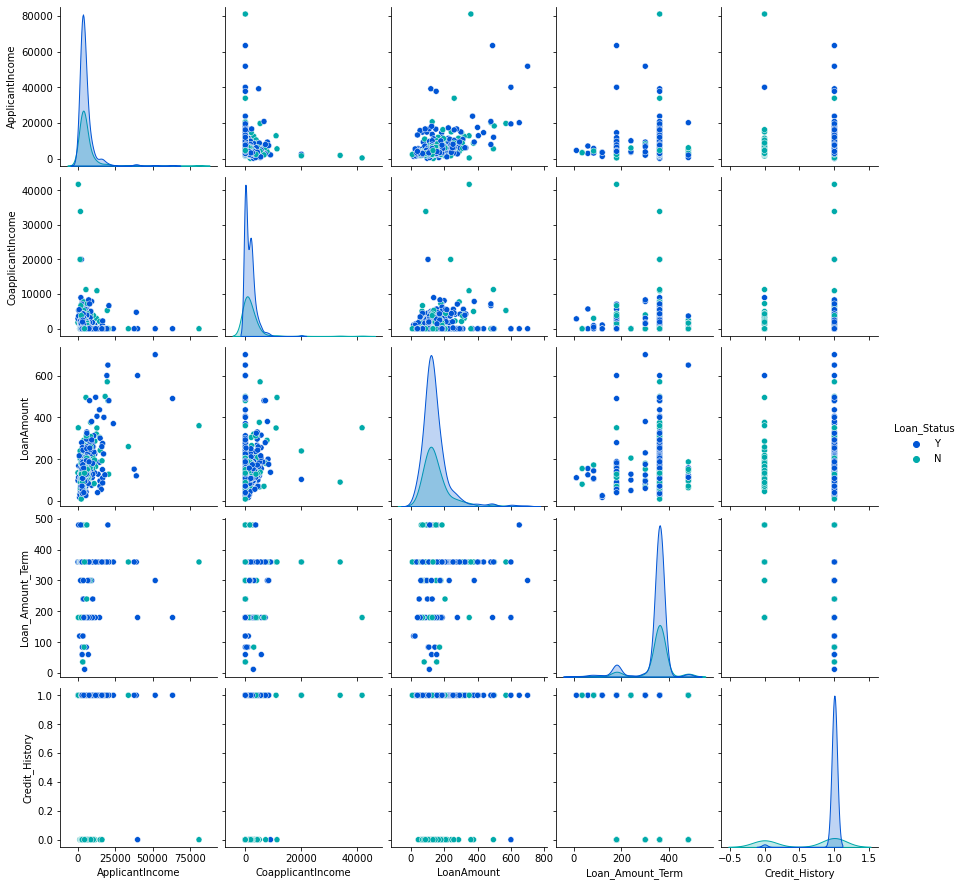

In [56]:
sns.pairplot(df, palette = 'winter', hue='Loan_Status')

# Label Encoding

In [57]:
#we need to convert categorical columns into numerical ones before proceeding further
label_encoder = preprocessing.LabelEncoder()

#encoding feature columns
df['Gender']=label_encoder.fit_transform(df['Gender'])

df['Married']=label_encoder.fit_transform(df['Married'])

df['Dependents']=label_encoder.fit_transform(df['Dependents'])

df['Education']=label_encoder.fit_transform(df['Education'])

df['Self_Employed']=label_encoder.fit_transform(df['Self_Employed'])

df['Property_Area']=label_encoder.fit_transform(df['Property_Area'])

#encoding target variable
df['Loan_Status']=label_encoder.fit_transform(df['Loan_Status'])

In [58]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 61.7 KB


# Correlation

In [60]:
#lets find out the correlation between the columns
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


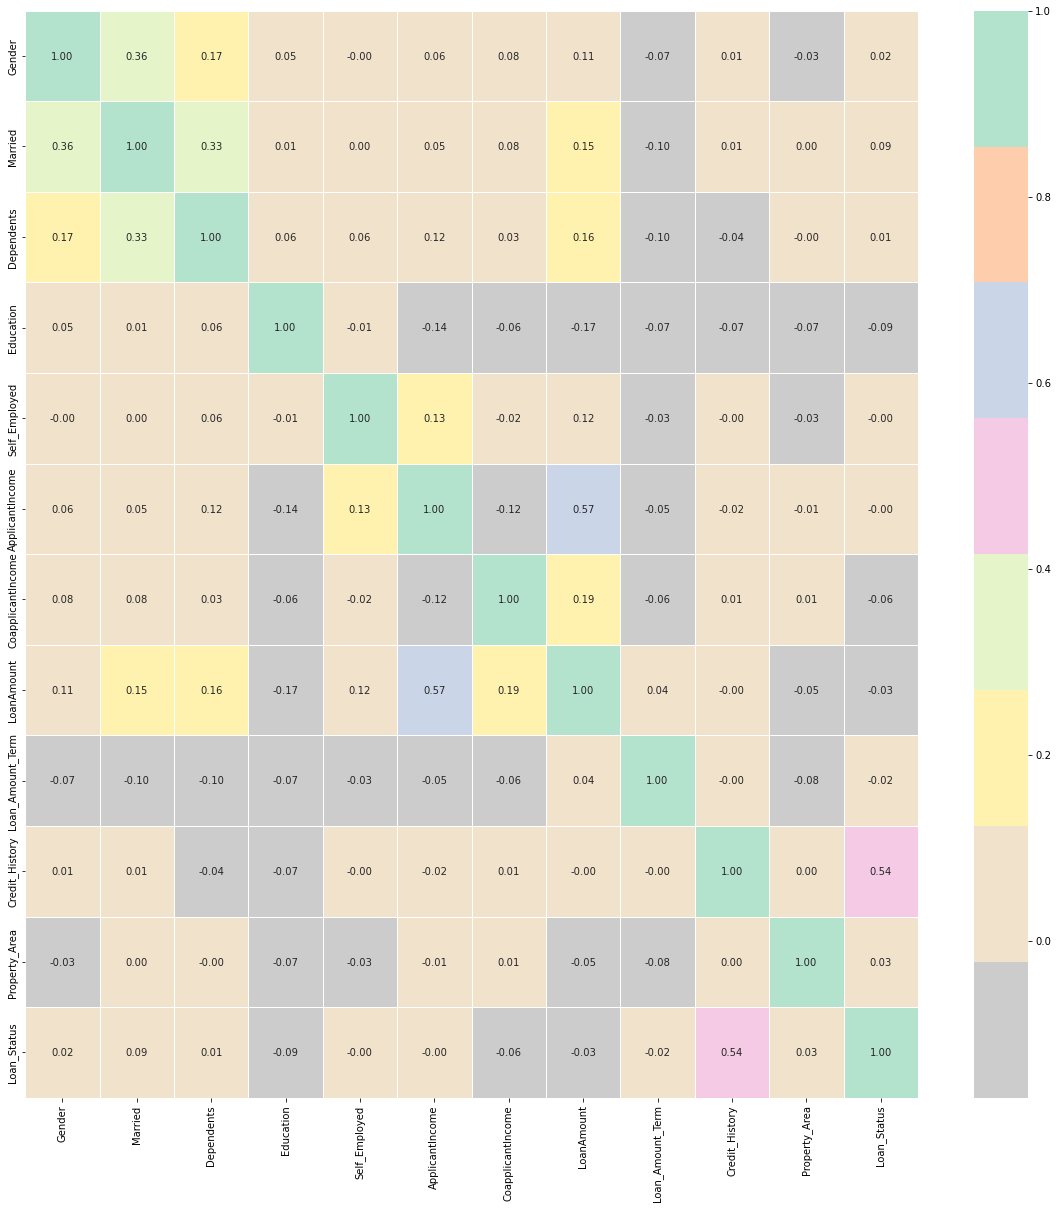

In [61]:
#lets plot the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=1,cmap='Pastel2_r')
plt.show()

Observation - Married , Gender and Dependents variable are showing multicollinearity.
- Credit_History is having 54% strong bond to the loan_status
- Married and gender are 36% correlated
- Married and dependents are 33% correlated

In [62]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

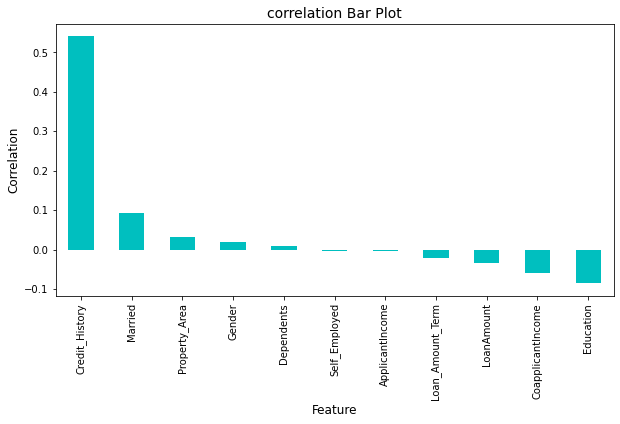

In [63]:
#Plotting the correlation
plt.figure(figsize=(10,5))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

Observation - Self_Employed and ApplicantIncome are least correlated to Loan_Status

# Detecting Multicollinearity with VIF and Data Cleaning

In [64]:
#separating the Features and Target Variable
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

              feature        VIF
0              Gender   6.002480
1             Married   3.654420
2          Dependents   1.792042
3           Education   1.306662
4       Self_Employed   1.176621
5     ApplicantIncome   2.888117
6   CoapplicantIncome   1.481955
7          LoanAmount   6.802713
8    Loan_Amount_Term  10.314989
9      Credit_History   6.058898
10      Property_Area   2.574130


VIF values ranging between 1 and 10 are moderate. They represent a medium level of collinearity. Values of more than 10 are highly collinear.
None of the feature is having VIF score higher than 10 so we don't need to remove any column

# Feature Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variables. The scikit-learn library provides the SelectKBest with f_classif() class that can be used with a suite of different statistical tests to select a specific number of features.

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
9,Credit_History,252.652090
1,Married,5.164552
3,Education,4.547685
6,CoapplicantIncome,2.151457
7,LoanAmount,0.675896
10,Property_Area,0.631733
8,Loan_Amount_Term,0.311334
0,Gender,0.198059
2,Dependents,0.062665
5,ApplicantIncome,0.013574


Observation- ApplicantIncome, Self_Employed are least significant for training model, hence dropping that

In [67]:
x = x.drop(['ApplicantIncome','Self_Employed'], axis = 1)
df = df.drop(['ApplicantIncome','Self_Employed'], axis = 1)

In [68]:
df.shape

(614, 10)

# Skewness

In [69]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Observation-

The acceptable skewness range is +/- 0.5,most of the features have high skewness involved.

# Distribution Curve

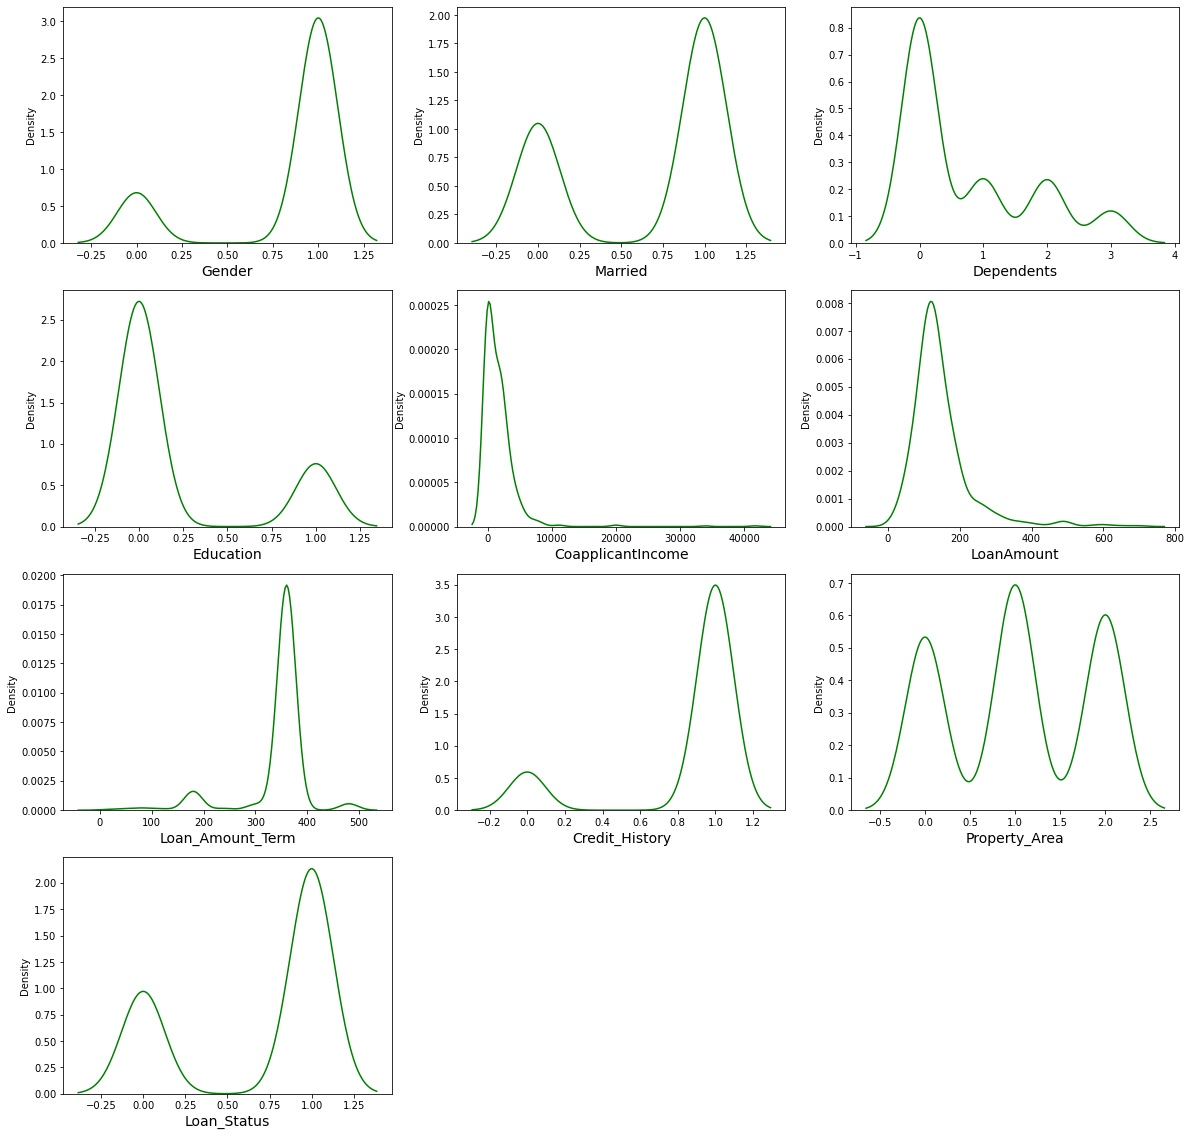

In [70]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=12:
        plt.subplot(4,3,plotnum)
        sns.kdeplot(df[col], color = 'g')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - There is considerable amount of skewness in most of the feature variables and target. we need to treat it but first of all we need to check outliers and remove that

# Checking Outliers

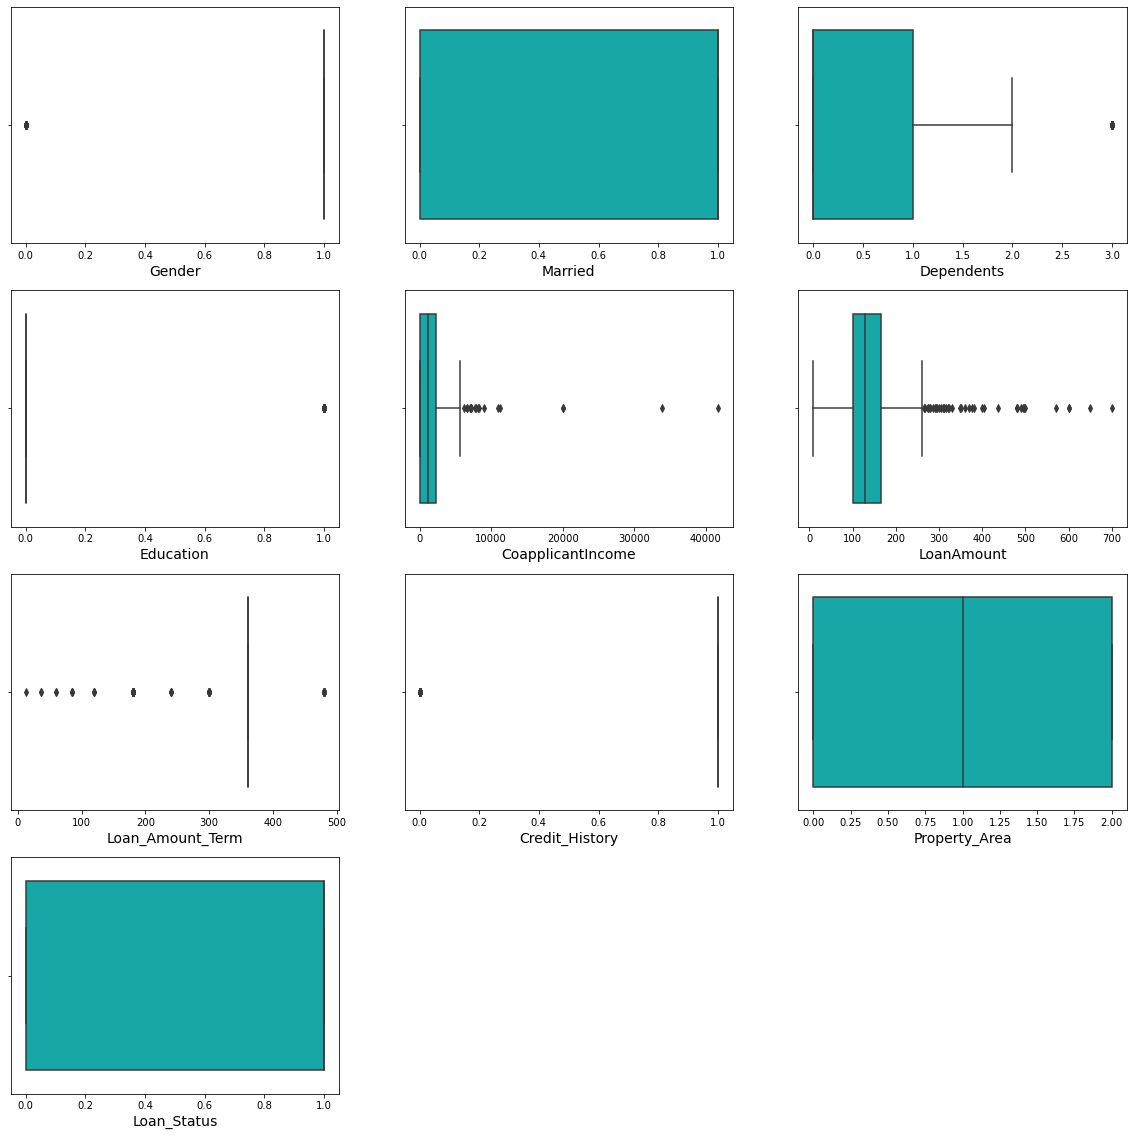

In [71]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=12:
        plt.subplot(4,3,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - as expected some of the feature variables have outliers. lets treat them with the help of z score method

# Removing Outliers

In [74]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df)

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.554487,-0.211241,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,-0.528362,-0.038732,-0.211241,0.273231,0.411733,-1.318513,-1.482537
2,0.472343,0.728816,-0.737806,-0.528362,-0.554487,-0.948996,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,-0.737806,1.892641,0.251980,-0.306435,0.273231,0.411733,1.223298,0.674519
4,0.472343,-1.372089,-0.737806,-0.528362,-0.554487,-0.056551,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.554487,-0.889500,0.273231,0.411733,-1.318513,0.674519
610,0.472343,0.728816,2.236021,-0.528362,-0.554487,-1.258378,-2.522836,0.411733,-1.318513,0.674519
611,0.472343,0.728816,0.253470,-0.528362,-0.472404,1.276168,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,-0.528362,-0.554487,0.490816,0.273231,0.411733,1.223298,0.674519


In [73]:
z = np.abs(zscore(df))
z.shape

(614, 10)

In [75]:
np.where(z>3) #detecting outliers where z>3

(array([  9,  14,  68,  94, 130, 133, 155, 171, 177, 177, 242, 262, 278,
        308, 313, 333, 369, 402, 417, 432, 487, 495, 497, 506, 523, 525,
        546, 561, 575, 581, 585, 600, 604], dtype=int64),
 array([4, 6, 6, 6, 5, 6, 5, 5, 4, 5, 6, 6, 5, 5, 6, 5, 5, 4, 4, 5, 5, 6,
        6, 5, 5, 5, 6, 5, 6, 4, 6, 4, 5], dtype=int64))

In [76]:
z.iloc[14] #checking one of the detected outliers

Gender               0.472343
Married              0.728816
Dependents           1.244745
Education            0.528362
CoapplicantIncome    0.183061
LoanAmount           1.532061
Loan_Amount_Term     3.454858
Credit_History       0.411733
Property_Area        1.223298
Loan_Status          0.674519
Name: 14, dtype: float64

# checking total number of rows where z>3

In [80]:
len(np.where(z>3)[0])

33

In [81]:
#percent loss
percent_loss = 33*100/614
print("Percent Loss: ",percent_loss)

Percent Loss:  5.374592833876221


This is in acceptable range, so removing the entries where z score for any of the feature variable is >3

In [83]:
#removing outliers

df_new = df[(z<3).all(axis=1)]

print("Old Data Frame:",df.shape)
print("New Data Frame:",df_new.shape)
print("Total Dropped Rows:",df.shape[0] - df_new.shape[0])

Old Data Frame: (614, 10)
New Data Frame: (582, 10)
Total Dropped Rows: 32


In [84]:
df_new.head()

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0.0,141.0,360.0,1.0,2,1


# Checking Outliers again using boxplot

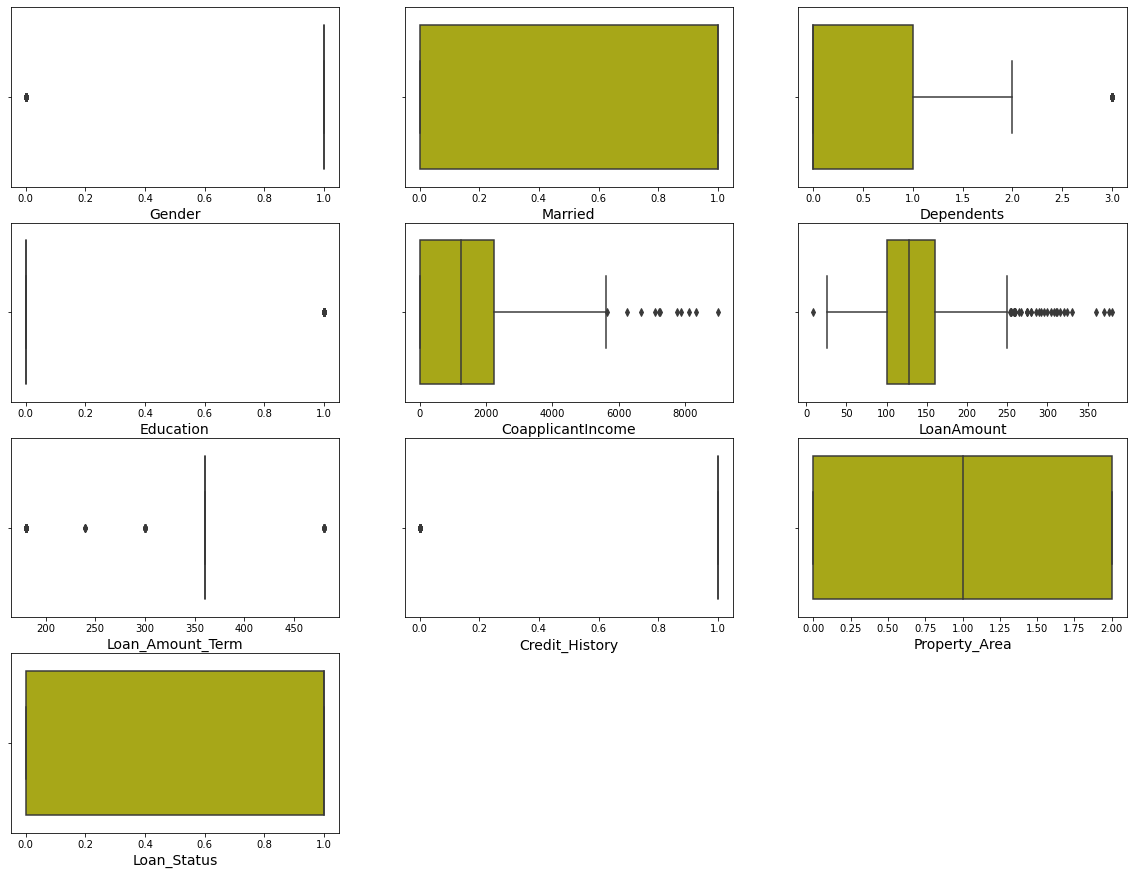

In [85]:
plt.figure(figsize=(20,35),facecolor='white')
plotnum=1
for col in df_new.columns:
    if plotnum<=26:
        plt.subplot(9,3,plotnum)
        sns.boxplot(df_new[col], color='y')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - outliers have been treated to some extent. Lets implement IQR method to treat outliers

# Treating Outliers using IQR method

In [86]:
X = df_new.drop('Loan_Status', axis=1)
Y = df_new['Loan_Status']

In [87]:
#create new dataframe
X_new = pd.DataFrame()

In [88]:
def detect_and_treat_outliers_iqr(data):
    new_list = []
    #data = sorted(data)
    
    median = np.median(data)# calculating median 

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            i = median    #replacing outlier with median as all the variables are of integer type
        new_list.append(i)
    return new_list 


for col in X.columns:
    X_new[col] = detect_and_treat_outliers_iqr(X[col])
    
X_new.head()

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0,0.0,0.0,0.0,128.0,360.0,1.0,2
1,1.0,1,1.0,0.0,1508.0,128.0,360.0,1.0,0
2,1.0,1,0.0,0.0,0.0,66.0,360.0,1.0,2
3,1.0,1,0.0,0.0,2358.0,120.0,360.0,1.0,2
4,1.0,0,0.0,0.0,0.0,141.0,360.0,1.0,2


In the above method we detected the Outliers using IQR method and replaced them with median

# Ploting Boxplot

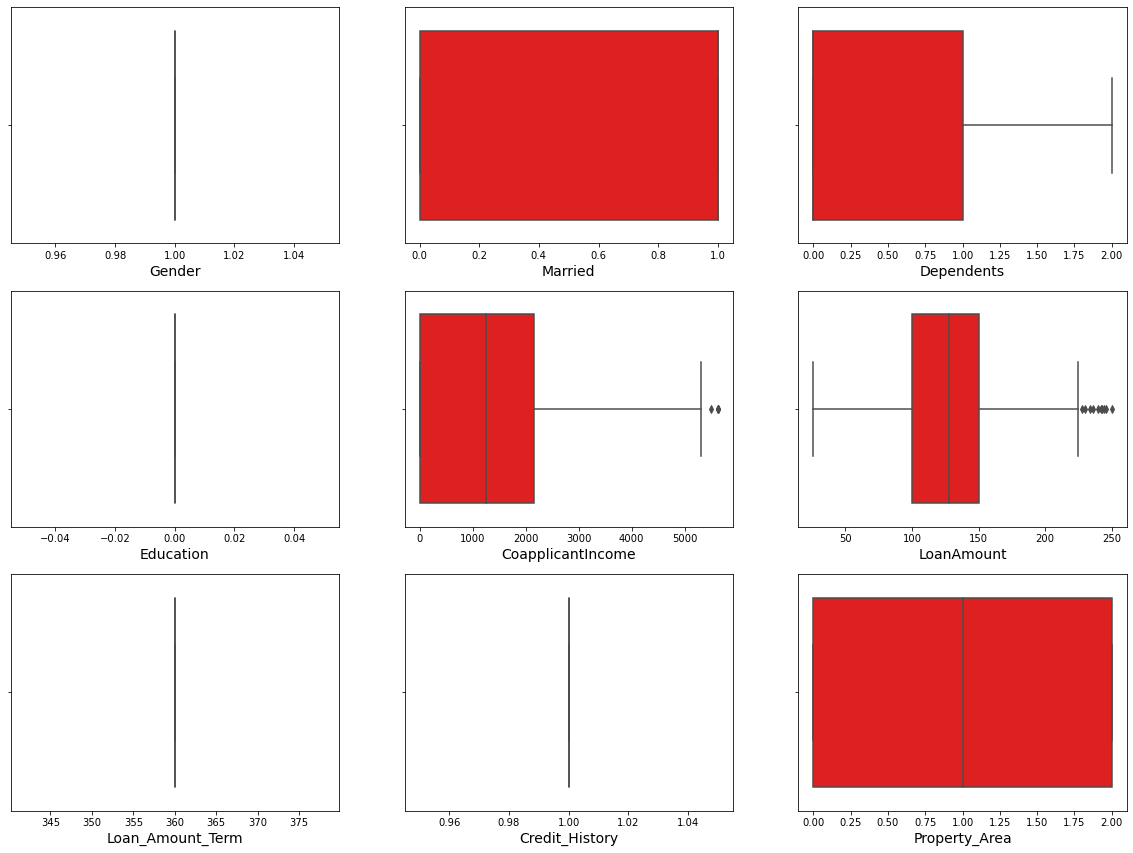

In [90]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in X_new.columns:
    if plotnum<=12:
        plt.subplot(4,3,plotnum)
        sns.boxplot(X_new[col], color='r')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - Outliers are still present in some of the feature variables that can be treated using normalization techniques later

# Balancing Target Variable

In [91]:
Y.value_counts()

1    401
0    181
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

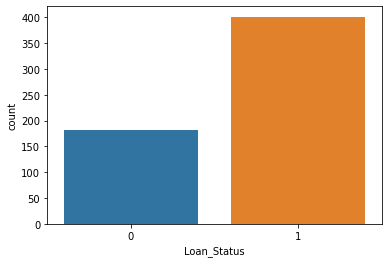

In [92]:
sns.countplot(Y)

In [93]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,Y = smt.fit_resample(X_new,Y,)
X,Y

(     Gender  Married  Dependents  Education  CoapplicantIncome  LoanAmount  \
 0       1.0        0    0.000000        0.0           0.000000  128.000000   
 1       1.0        1    1.000000        0.0        1508.000000  128.000000   
 2       1.0        1    0.000000        0.0           0.000000   66.000000   
 3       1.0        1    0.000000        0.0        2358.000000  120.000000   
 4       1.0        0    0.000000        0.0           0.000000  141.000000   
 ..      ...      ...         ...        ...                ...         ...   
 797     1.0        0    0.843567        0.0        5215.648829  143.944465   
 798     1.0        0    0.842179        0.0           0.000000   66.368714   
 799     1.0        1    2.000000        0.0        1166.500138  146.517613   
 800     1.0        1    0.842609        0.0        1603.009573  178.898264   
 801     1.0        0    0.000000        0.0        1253.318731  125.488528   
 
      Loan_Amount_Term  Credit_History  Property_A

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

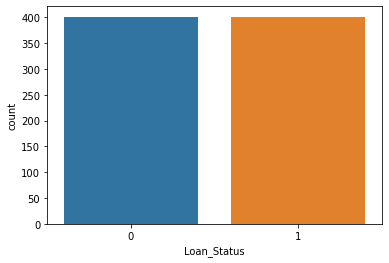

In [94]:
sns.countplot(Y)

In [95]:
X.shape

(802, 9)

In [96]:
Y.shape

(802,)

Target data has been balanced using SMOTE

# Transforming data to remove skewness further (Power Transform)

In [97]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)

numpy.ndarray

In [98]:
X.mean()

-1.0882092923884771e-14

In [99]:
X.std()

0.7453559924999299

mean = 0 and Standard deviation = 0.74, our feature variable are amost normalized

# Feature Scaling using Standard Scaler

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8
0,0.0,-1.195953,-0.753558,0.0,-1.075183,0.058172,0.0,0.0,1.296364
1,0.0,0.836153,1.248494,0.0,0.806571,0.058172,0.0,0.0,-1.243203
2,0.0,0.836153,-0.753558,0.0,-1.075183,-1.618448,0.0,0.0,1.296364
3,0.0,0.836153,-0.753558,0.0,0.944104,-0.143994,0.0,0.0,1.296364
4,0.0,-1.195953,-0.753558,0.0,-1.075183,0.380005,0.0,0.0,1.296364


# Model Building

As this is a binary classification Problem, I will train the follwoing models -

- A. Logistic Regression
- B. Decision Trees
- C. Random Forests
- D. SVC linear kernel
- E. SGD Classifier
- F. KNN (K_nearest_neighbors)
- G. AdaBoost Classifier
- H. Gradiant Boost Classifier
- I. Bagging Classifier

In [105]:
#importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

# Finding best Random State

In [106]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    
    pred_train = rfc.predict(x_train)
    pred_test = rfc.predict(x_test)
    
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('test accuracy is :',maxAccu,'at random_state:',maxRS)

test accuracy is : 0.7391304347826086 at random_state: 71


# Creating the Training and Testing data set

In [107]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=maxRS, test_size=0.20, stratify = Y)

#creating models empty dataframe
models_df = pd.DataFrame()

# Machine Learning Model

In [108]:
def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    #classification report
    print('Classification Report :\n',classification_report(y_test,pred))
    
    #confusion matrix
    conf = confusion_matrix(y_test, pred)
    tp = conf[0,0]
    fp = conf[0,1]
    tn = conf[1,1]
    fn = conf[1,0]
    sns.heatmap(conf, annot=True)
    
    #accracy score
    acs = accuracy_score(y_test,pred)
    print('Accuracy :',acs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=KFold(n_splits=10, shuffle = True)).mean()
    print('Cross validation score :',cvs)
    
    #difference in accuracy and cross validation score
    diff = abs(acs - cvs)
    print('Accuracy and CV Score Diff :', diff)
    
    #ROC Score
    rocs = roc_auc_score(y_test,pred)
    print("ROC AUC Score :", rocs)
    
    #ROC AUC curve
    fpr,tpr,threshold = roc_curve(y_test, model.predict(x_test))
    plt.figure(figsize=(5,5),facecolor='white')    
    plt.plot(fpr,tpr,label=model_name)
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic")
    plt.show()
    
    #appending data to dataframe
    models_df[sc] = [model_name, acs, cvs, diff, tp, fp, fn, tn, rocs,fpr,tpr]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual', fontsize = 14)
    plt.ylabel('Predicted', fontsize = 14)
    plt.show()

# A) Logistic Regression

Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.59      0.59        80
           1       0.60      0.60      0.60        81

    accuracy                           0.60       161
   macro avg       0.60      0.60      0.60       161
weighted avg       0.60      0.60      0.60       161

Accuracy : 0.5962732919254659
Cross validation score : 0.5897222222222223
Accuracy and CV Score Diff : 0.006551069703243595
ROC AUC Score : 0.5962191358024692


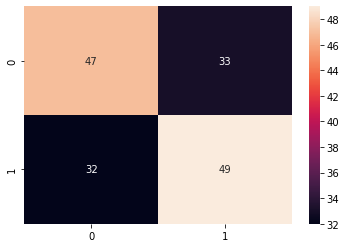

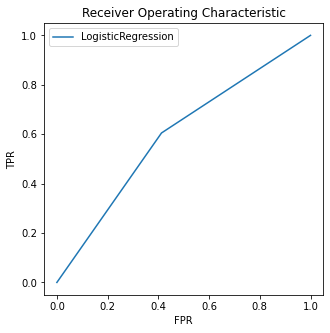

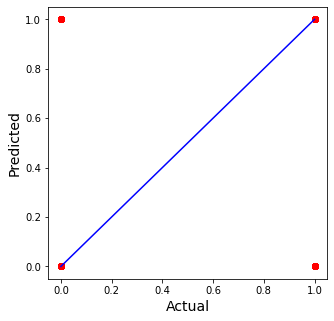

In [109]:
reg_func(LogisticRegression(),X,Y, 'LogisticRegression','lr')

# B) Decision Tree Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        80
           1       0.69      0.72      0.70        81

    accuracy                           0.70       161
   macro avg       0.70      0.70      0.70       161
weighted avg       0.70      0.70      0.70       161

Accuracy : 0.6956521739130435
Cross validation score : 0.6321604938271606
Accuracy and CV Score Diff : 0.0634916800858829
ROC AUC Score : 0.6955246913580247


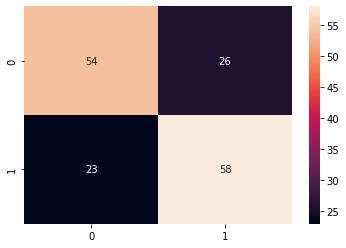

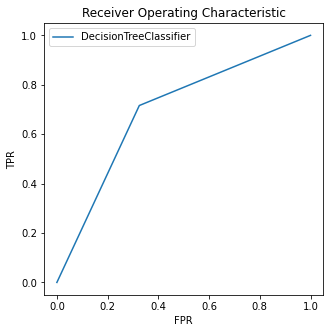

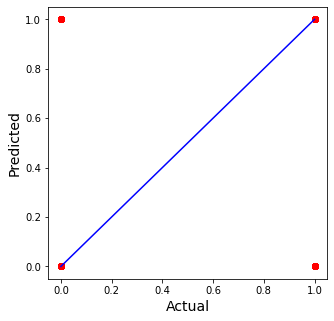

In [110]:
from sklearn.tree import DecisionTreeClassifier
reg_func(DecisionTreeClassifier(), X, Y, 'DecisionTreeClassifier','dtc')

# C) Random Forests Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        80
           1       0.71      0.75      0.73        81

    accuracy                           0.72       161
   macro avg       0.72      0.72      0.72       161
weighted avg       0.72      0.72      0.72       161

Accuracy : 0.7204968944099379
Cross validation score : 0.6559876543209876
Accuracy and CV Score Diff : 0.06450924008895031
ROC AUC Score : 0.7202932098765431


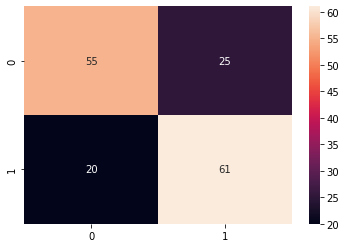

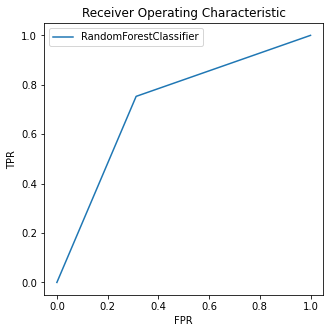

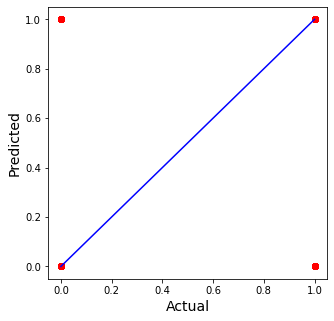

In [111]:
from sklearn.ensemble import RandomForestClassifier
reg_func(RandomForestClassifier(), X, Y,'RandomForestClassifier','rfc')

# D) SVM Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.58      0.60      0.59        80
           1       0.59      0.57      0.58        81

    accuracy                           0.58       161
   macro avg       0.58      0.58      0.58       161
weighted avg       0.58      0.58      0.58       161

Accuracy : 0.5838509316770186
Cross validation score : 0.5835493827160494
Accuracy and CV Score Diff : 0.00030154896096923345
ROC AUC Score : 0.5839506172839506


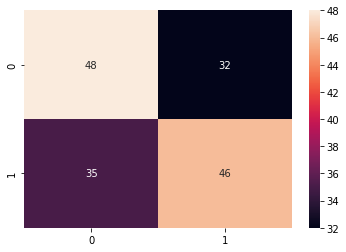

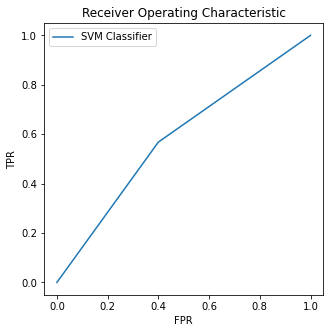

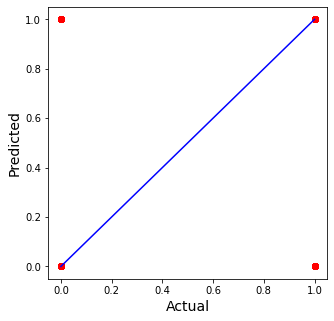

In [112]:
from sklearn.svm import SVC
reg_func(SVC(),X,Y,'SVM Classifier','svmc')

# E) SGD Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.57      0.81      0.67        80
           1       0.68      0.40      0.50        81

    accuracy                           0.60       161
   macro avg       0.63      0.60      0.59       161
weighted avg       0.63      0.60      0.58       161

Accuracy : 0.6024844720496895
Cross validation score : 0.5610956790123457
Accuracy and CV Score Diff : 0.041388793037343774
ROC AUC Score : 0.6037808641975309


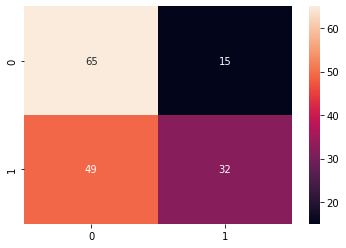

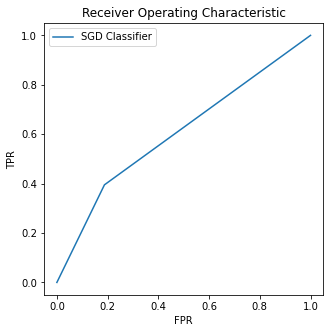

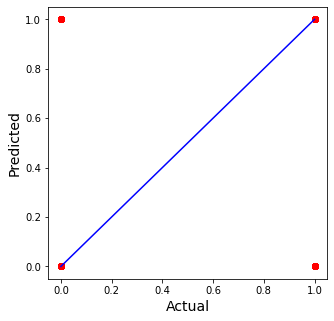

In [113]:
from sklearn.linear_model import SGDClassifier
reg_func(SGDClassifier(),X,Y,'SGD Classifier','sgdc')

# F) KNN (k Nearest Neighbour)

Classification Report :
               precision    recall  f1-score   support

           0       0.63      0.57      0.60        80
           1       0.61      0.67      0.64        81

    accuracy                           0.62       161
   macro avg       0.62      0.62      0.62       161
weighted avg       0.62      0.62      0.62       161

Accuracy : 0.6211180124223602
Cross validation score : 0.5497530864197533
Accuracy and CV Score Diff : 0.07136492600260691
ROC AUC Score : 0.6208333333333332


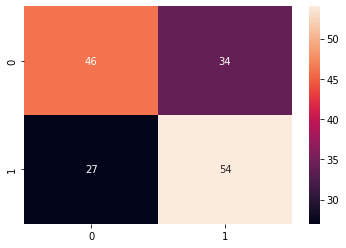

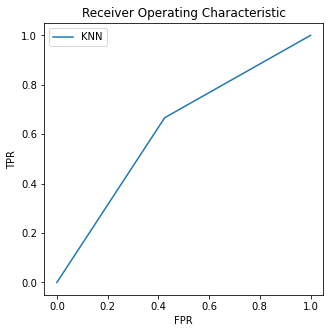

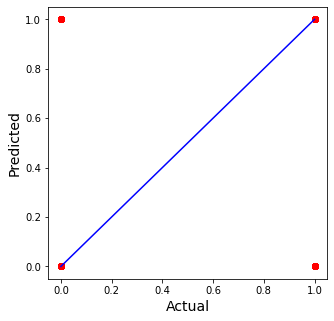

In [114]:
from sklearn.neighbors import KNeighborsClassifier
reg_func(KNeighborsClassifier(),X,Y,'KNN','knn')

# G) ADA Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.61      0.63        80
           1       0.64      0.67      0.65        81

    accuracy                           0.64       161
   macro avg       0.64      0.64      0.64       161
weighted avg       0.64      0.64      0.64       161

Accuracy : 0.639751552795031
Cross validation score : 0.630895061728395
Accuracy and CV Score Diff : 0.008856491066635996
ROC AUC Score : 0.6395833333333333


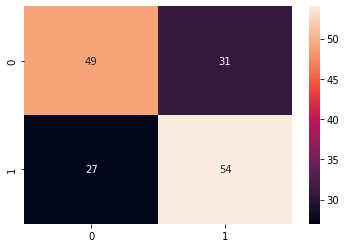

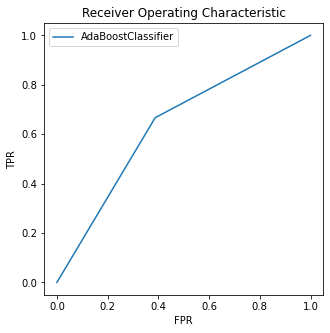

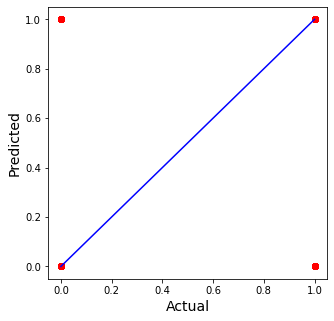

In [115]:
from sklearn.ensemble import AdaBoostClassifier
reg_func(AdaBoostClassifier(), X,Y,'AdaBoostClassifier','abc')

# H) Gradient Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.69      0.64      0.66        80
           1       0.67      0.72      0.69        81

    accuracy                           0.68       161
   macro avg       0.68      0.68      0.68       161
weighted avg       0.68      0.68      0.68       161

Accuracy : 0.6770186335403726
Cross validation score : 0.6595987654320987
Accuracy and CV Score Diff : 0.017419868108273895
ROC AUC Score : 0.6767746913580246


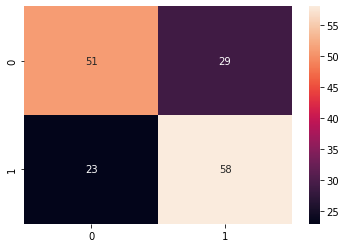

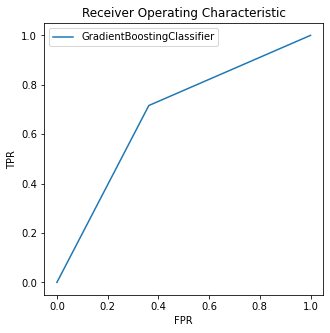

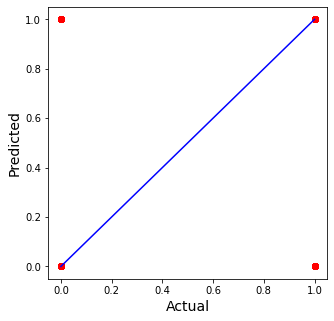

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
reg_func(GradientBoostingClassifier(),X,Y,'GradientBoostingClassifier','gbc')

# I) Bagging Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.66      0.72      0.69        80
           1       0.70      0.63      0.66        81

    accuracy                           0.68       161
   macro avg       0.68      0.68      0.68       161
weighted avg       0.68      0.68      0.68       161

Accuracy : 0.6770186335403726
Cross validation score : 0.6520987654320988
Accuracy and CV Score Diff : 0.024919868108273846
ROC AUC Score : 0.6773148148148149


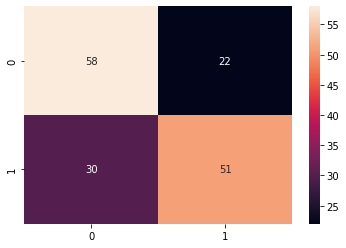

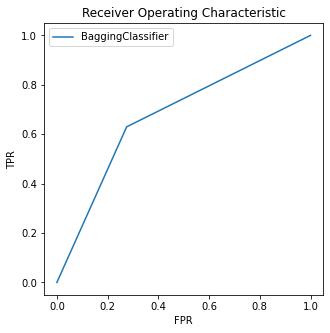

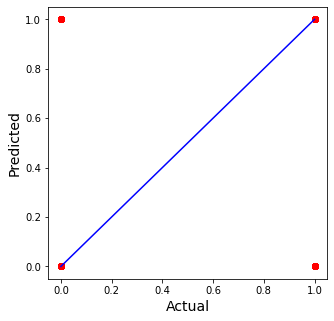

In [117]:
from sklearn.ensemble import BaggingClassifier

reg_func(BaggingClassifier(),X,Y,'BaggingClassifier','bc')

# Analysing Scores

In [118]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4,5,6,7,8,9,10
lr,LogisticRegression,0.596273,0.589722,0.006551,47,33,32,49,0.596219,"[0.0, 0.4125, 1.0]","[0.0, 0.6049382716049383, 1.0]"
dtc,DecisionTreeClassifier,0.695652,0.63216,0.063492,54,26,23,58,0.695525,"[0.0, 0.325, 1.0]","[0.0, 0.7160493827160493, 1.0]"
rfc,RandomForestClassifier,0.720497,0.655988,0.064509,55,25,20,61,0.720293,"[0.0, 0.3125, 1.0]","[0.0, 0.7530864197530864, 1.0]"
svmc,SVM Classifier,0.583851,0.583549,0.000302,48,32,35,46,0.583951,"[0.0, 0.4, 1.0]","[0.0, 0.5679012345679012, 1.0]"
sgdc,SGD Classifier,0.602484,0.561096,0.041389,65,15,49,32,0.603781,"[0.0, 0.1875, 1.0]","[0.0, 0.3950617283950617, 1.0]"
knn,KNN,0.621118,0.549753,0.071365,46,34,27,54,0.620833,"[0.0, 0.425, 1.0]","[0.0, 0.6666666666666666, 1.0]"
abc,AdaBoostClassifier,0.639752,0.630895,0.008856,49,31,27,54,0.639583,"[0.0, 0.3875, 1.0]","[0.0, 0.6666666666666666, 1.0]"
gbc,GradientBoostingClassifier,0.677019,0.659599,0.01742,51,29,23,58,0.676775,"[0.0, 0.3625, 1.0]","[0.0, 0.7160493827160493, 1.0]"
bc,BaggingClassifier,0.677019,0.652099,0.02492,58,22,30,51,0.677315,"[0.0, 0.275, 1.0]","[0.0, 0.6296296296296297, 1.0]"


In [119]:
model_stats.columns = ['Model','Accuracy Score', 'Cross Validation Score', 'Difference','True +ve', 'False +ve', 'False -ve', 'True -ve','ROC Score','FPR','TPR']
model_stats

,Model,Accuracy Score,Cross Validation Score,Difference,True +ve,False +ve,False -ve,True -ve,ROC Score,FPR,TPR
lr,LogisticRegression,0.596273,0.589722,0.006551,47,33,32,49,0.596219,"[0.0, 0.4125, 1.0]","[0.0, 0.6049382716049383, 1.0]"
dtc,DecisionTreeClassifier,0.695652,0.63216,0.063492,54,26,23,58,0.695525,"[0.0, 0.325, 1.0]","[0.0, 0.7160493827160493, 1.0]"
rfc,RandomForestClassifier,0.720497,0.655988,0.064509,55,25,20,61,0.720293,"[0.0, 0.3125, 1.0]","[0.0, 0.7530864197530864, 1.0]"
svmc,SVM Classifier,0.583851,0.583549,0.000302,48,32,35,46,0.583951,"[0.0, 0.4, 1.0]","[0.0, 0.5679012345679012, 1.0]"
sgdc,SGD Classifier,0.602484,0.561096,0.041389,65,15,49,32,0.603781,"[0.0, 0.1875, 1.0]","[0.0, 0.3950617283950617, 1.0]"
knn,KNN,0.621118,0.549753,0.071365,46,34,27,54,0.620833,"[0.0, 0.425, 1.0]","[0.0, 0.6666666666666666, 1.0]"
abc,AdaBoostClassifier,0.639752,0.630895,0.008856,49,31,27,54,0.639583,"[0.0, 0.3875, 1.0]","[0.0, 0.6666666666666666, 1.0]"
gbc,GradientBoostingClassifier,0.677019,0.659599,0.01742,51,29,23,58,0.676775,"[0.0, 0.3625, 1.0]","[0.0, 0.7160493827160493, 1.0]"
bc,BaggingClassifier,0.677019,0.652099,0.02492,58,22,30,51,0.677315,"[0.0, 0.275, 1.0]","[0.0, 0.6296296296296297, 1.0]"


# ROC AUC CURVE for all the Model

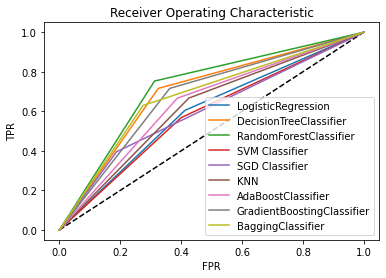

In [120]:
plt.plot([0,1],[0,1], 'k--')
for i in range(0,model_stats.shape[0]):
    plt.plot(model_stats['FPR'][i], model_stats['TPR'][i], label=model_stats['Model'][i])
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic")
plt.show()

# Visualizing Accuracy Score for all Models

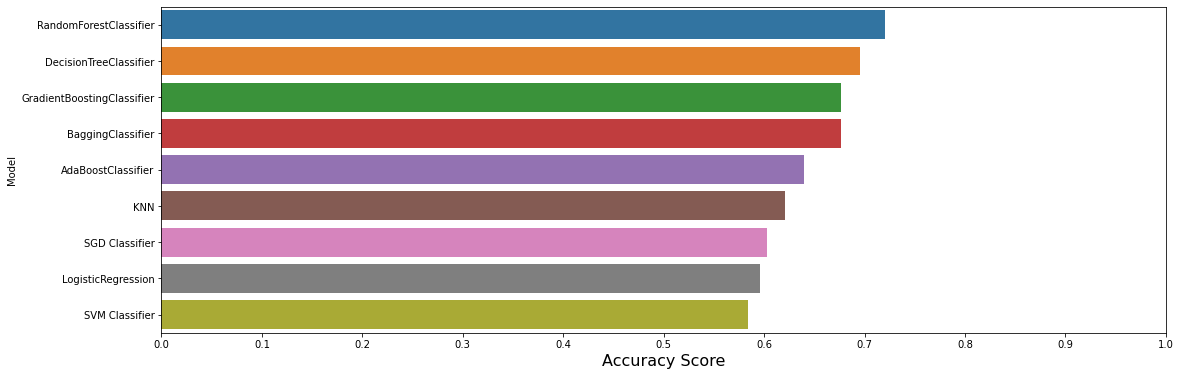

In [121]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

sns.barplot(x='Accuracy Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest have highest accuracy score i.e. 72%

# Visualizing Cross Validation Score for all Models

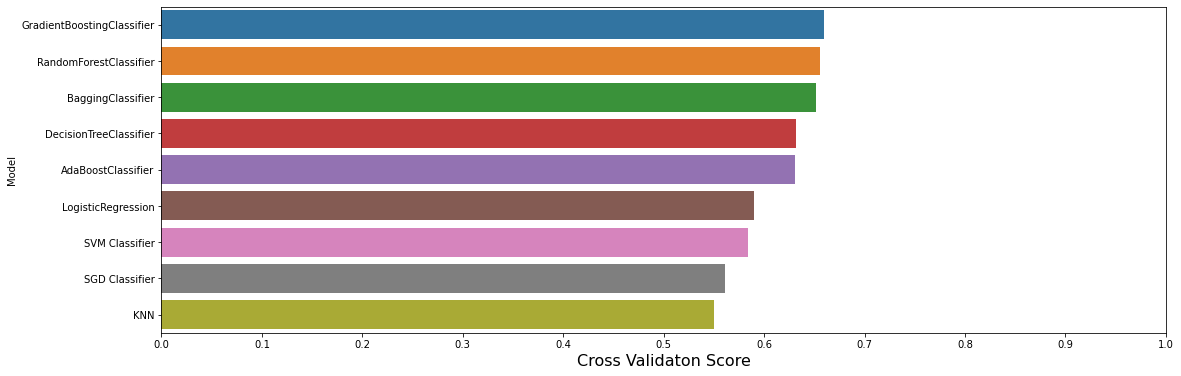

In [122]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest and Gradient Boost have almost same cross validation score as 65%

# Visualizing False Predictions for all Models

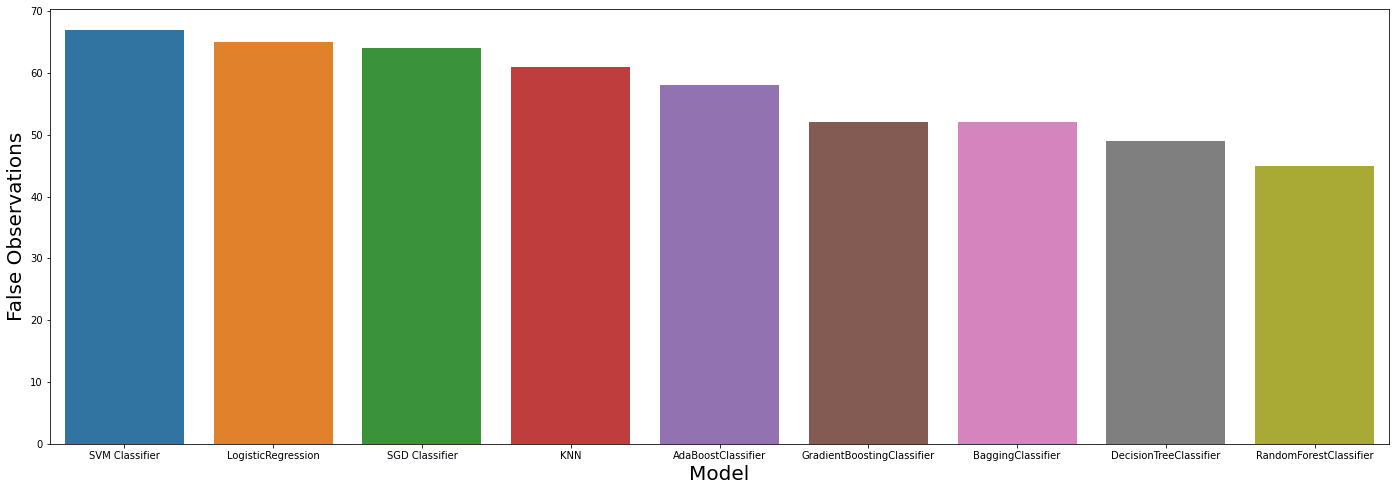

In [123]:
model_stats.sort_values(by=(['Accuracy Score']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = model_stats['Model'], y=model_stats['False +ve'] + model_stats['False -ve'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

Observation - Random Forest have least false predictions

Hence, Random Forest Classifier can be choosen as the best model for this binary classification problem

# Hyper Parameter Tuning with Random Forest Classifier

In [124]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy','log_loss'],"max_depth":['auto',2,4,6,8,10],'n_estimators':[100,200,300]}
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=KFold(n_splits=10, shuffle = True),scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'log_loss', 'max_depth': 4, 'n_estimators': 200}

Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.64      0.68        80
           1       0.68      0.75      0.71        81

    accuracy                           0.70       161
   macro avg       0.70      0.70      0.69       161
weighted avg       0.70      0.70      0.69       161

Accuracy : 0.6956521739130435
Cross validation score : 0.6583333333333333
Accuracy and CV Score Diff : 0.03731884057971013
ROC AUC Score : 0.6952932098765432


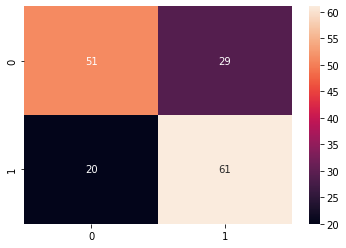

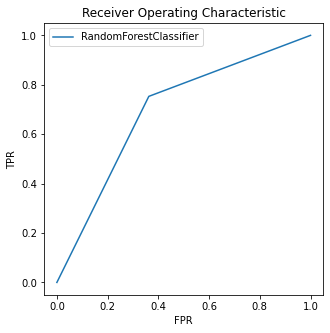

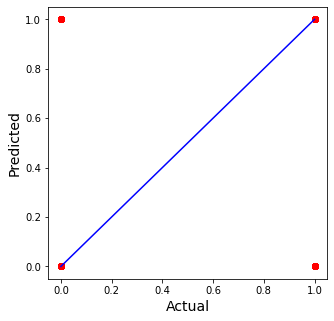

In [125]:
GCV.best_estimator_
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 100) 
reg_func(rfc, X, Y,'RandomForestClassifier','rfc')

# Saving the Model

In [126]:
import pickle
filename = 'loan_application_status_prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [127]:
loaded_model = pickle.load(open('loan_application_status_prediction.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

69.56521739130434


In [128]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
Predicted,1,1,1,0,1,1,0,0,1,1,...,1,0,1,1,0,1,0,1,0,0
Original,1,0,1,0,1,1,0,0,1,1,...,1,1,0,0,0,1,0,1,1,0


# This model is 69.56% Accurate